# Exploratory data analysis using correlation matrices and random forest feature importance

# Random forest feature importance

In [2]:
from constants import feature_cols
import pandas as pd

census_data = pd.read_csv('combined_data.csv')

X = census_data[feature_cols]
y = census_data['Democrat']

## Fitting the classifier model:

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf_classification_model = RandomForestClassifier(n_estimators=100, oob_score=True,random_state=42)

rf_classification_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

## Plotting feature importance

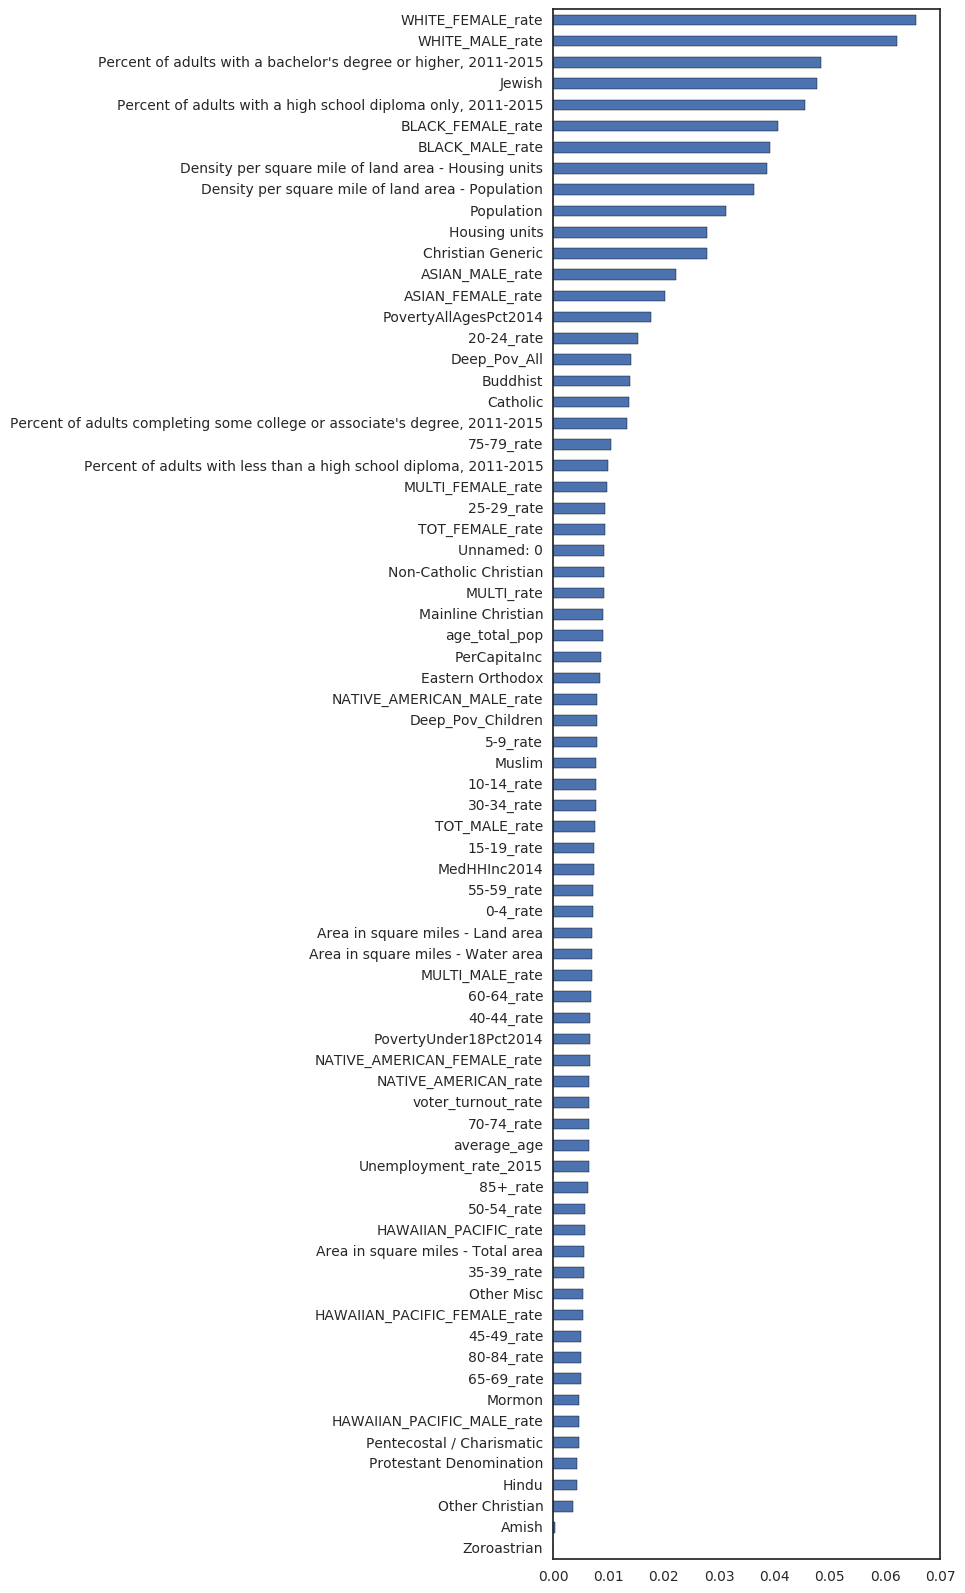

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances = pd.Series(rf_classification_model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(5,20));

# Correlation matrix of features with high importance

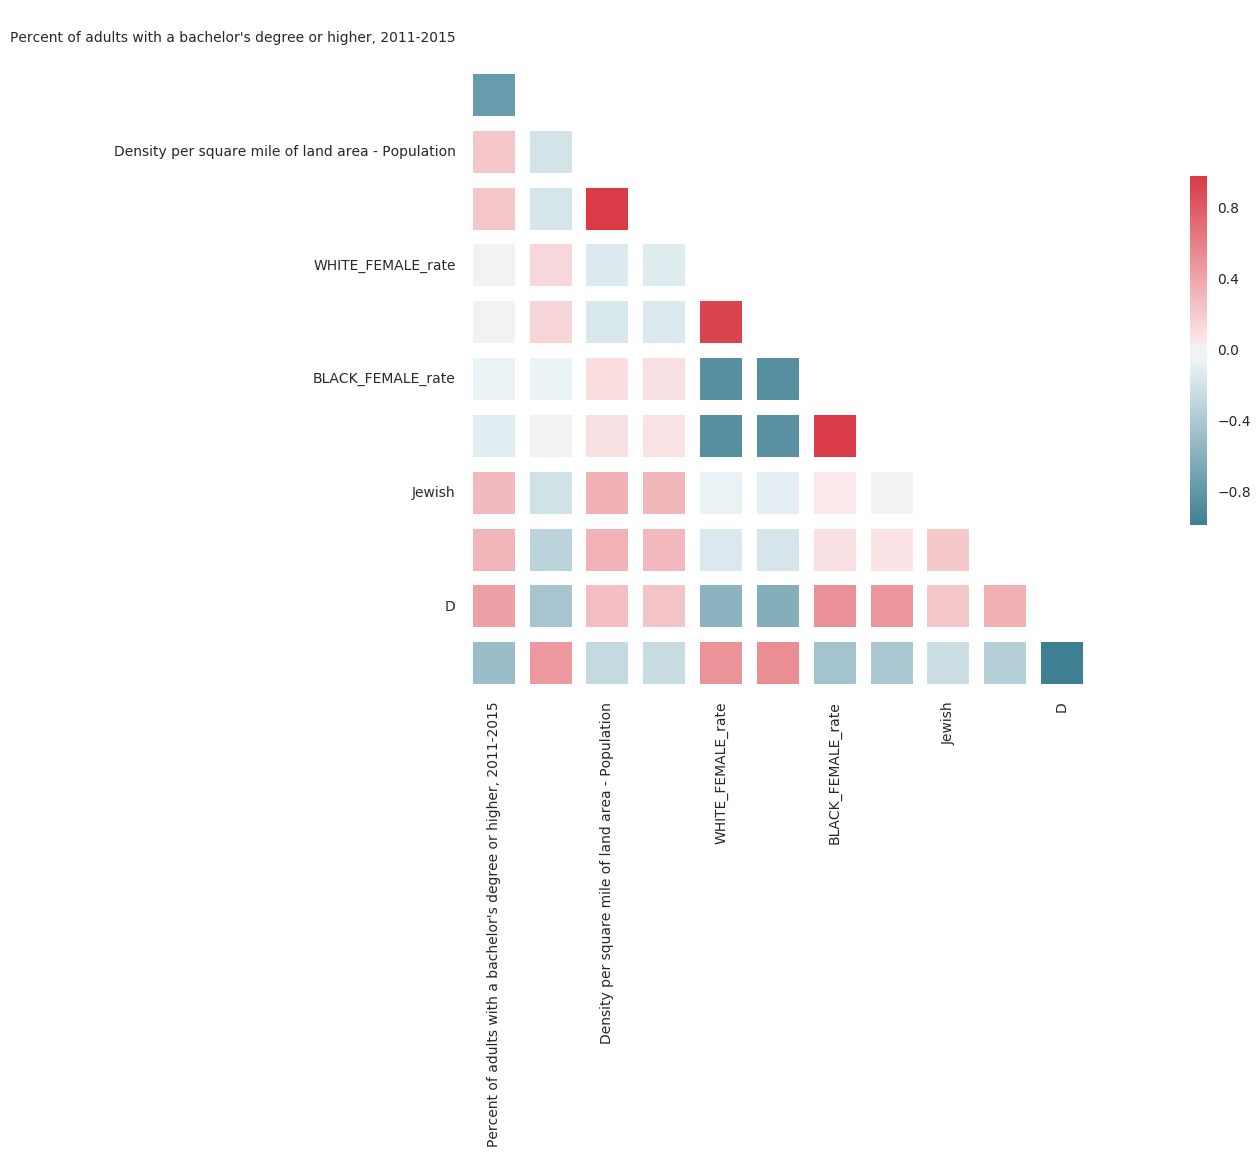

In [73]:
import numpy as np
import seaborn as sns

filtered_data = census_data[filtered_cols]

def make_heatmap(df):
    f, ax = plt.subplots(figsize=(11, 9))
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
        
%matplotlib inline

make_heatmap(filtered_data)

# Write file for decision tree visualization

In [75]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

census_data = pd.read_csv('combined_data.csv')


#X = census_data[feature_cols]
X = census_data.drop(drop_columns, axis=1)
y = census_data['Democrat']


clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
clf = clf.fit(X, y)

with open("election.dot", 'w') as f:
     f = tree.export_graphviz(clf, out_file=f)

## Additional analysis via Tableau

- [Split points of Top 10 Features](https://public.tableau.com/profile/publish/2016PresidentialElectionAnalysis-FeatureSplitPoints/SplitPointDash#!/publish-confirm)
 - In this workbook, you can view several split points for features of high importance and examine voting trends above and below the split point
- [Split Points with Heat Map](https://public.tableau.com/profile/publish/2016PresidentialElectionAnalysis-SplitPointswithHeatMap/SplitPointDash#!/publish-confirm)
 - Same as above but a heat map of the US replaces the histogram. The heat map can be filtered by clicking the pie chart.
- [Population Distribution by Voter Turnout](https://public.tableau.com/profile/publish/2016PresidentialElectionAnalysis-PopulationDistributionbyVoterTurn-out/Populationdistributionbyvoterturnout#!/publish-confirm)
 - In this wokrbook, you can choose a variable for the x and y axes, as well as apply filters based on the split points in the previous workbook. This allows us to examine the interplay of several features at once.
- [Interrelationships Among Explanatory Variables](https://public.tableau.com/profile/publish/2016PresidentialElectionAnalysis-DataExploration/3-VariableDash#!/publish-confirm)
 - In this workbook, you can choose a variable for the x and y axes, as well as apply filters based on the split points in the previous workbook. This allows us to examine the interplay of several features at once.